# About this Notebook:

Here we will be performing Profilling on the clusters created in the previous notebook, and discuss marketing strategies<br>

There is four parts in this notebook:<br>
PART 1: INCOME VS - EXPENDITURE, PLACE OF PURCHASE & CAMPAIGNS ACCEPTANCE<br>
PART 2: DEMOGRAPHIC<br>
PART 3: CONSUMER BEHAVIOUR<br>
PART 4: MARKETING STRATEGIES DISCUSSION

#  About the dataset:

**The columns can be further divided into the 4 feature groups (Place, Product, Promotion, People)**
1. People
1. Place
1. Product
1. Promotion

**People**

1.  Age: Customer's age (NEW)
1.  Education: Customer's education level
1.  Relationship_status: Customer's relationship status
1.  Income: Customer's yearly household income
1.  Kidhome: Number of children in customer's household
1.  Teenhome: Number of teenagers in customer's household
1.  KidTeenhome: Number of children & teenagers in customer's household (NEW)

**Product**

1.  MntWinesProducts: Amount spent on wine in last 2 years
1.  MntFruitsProducts: Amount spent on fruits in last 2 years
1.  MntMeatProducts: Amount spent on meat in last 2 years
1.  MntFishProducts: Amount spent on fish in last 2 years
1.  MntSweetProducts: Amount spent on sweets in last 2 years
1.  MntGoldProducts: Amount spent on gold in last 2 years
1.  TotalAMntspent:Total amount spend in last 2 years (NEW)

**Promotion**<br>
1.  NumDealsPurchases: Number of purchases made with a discount
1.  AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
1.  AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1.  AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1.  AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
1.  AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
1.  AcceptedCmpLast: 1 if customer accepted the offer in the last campaign, 0 otherwise
1.  TotalCmpAccepted: Number of offers accepted by customer (NEW)

**Place**
1.  NumWebPurchases: Number of purchases made through the company’s website
1.  NumCatalogPurchases: Number of purchases made using a catalogue
1.  NumStorePurchases: Number of purchases made directly in stores
1.  TotalNumPurchases: Total number of purchases made by a customer (NEW)
1.  NumWebVisitsMonth: Number of visits to company’s website in the last month


# Imports and Functions creation

In [1]:
import numpy as np 
import pandas as pd 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Visualisation:
import seaborn               as sns
import matplotlib.pyplot     as plt
sns.set_theme(style="whitegrid")

In [2]:
#Showing missing, duplicates, shape, dtypes
def df_summary(df):
    print(f"Shape(col,rows): {df.shape}")
    print(f"Number of duplicates: {df.duplicated().sum()}")
    print('---'*20)
    print(f'Number of each unqiue datatypes:\n{df.dtypes.value_counts()}')
    print('---'*20)
    print("Columns with missing values:")
    isnull_df = pd.DataFrame(df.isnull().sum()).reset_index()
    isnull_df.columns = ['col','num_nulls']
    isnull_df['perc_null'] = ((isnull_df['num_nulls'])/(len(df))).round(2)
    _df_ = isnull_df[isnull_df['num_nulls']>0]
    if _df_.empty:
        print("--No Missing Data--")
    else:
        print(_df_)

#Visualisation        
##Annotate Barchart
def annotation_fx(my_barchart):
    for each_bar in my_barchart.patches:
        plt.annotate(format(each_bar.get_height(), '.0f'),
                       (each_bar.get_x() + each_bar.get_width() / 2,
                        each_bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

In [3]:
# Data Import
cleaned_df = pd.read_csv("Data/clustered_data.csv")
df = cleaned_df.copy()

## Quick look at the data at this point

In [4]:
# Quick look at the dataframe
df.head()

,Education,Income,Kidhome,Teenhome,MntWinesProducts,MntFruitsProducts,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmpLast,Relationship_status,TotalAMntspent,TotalCmpAccepted,TotalNumPurchases,Age,KidTeenhome,Cluster
0,Graduate,58138.0,0,0,635,88,546,172,88,88,...,0,0,1,Unattached,1617,1,22,57,0,1
1,Graduate,46344.0,1,1,11,1,6,2,1,6,...,0,0,0,Unattached,27,0,4,60,2,2
2,Graduate,71613.0,0,0,426,49,127,111,21,42,...,0,0,0,Attached,776,0,20,49,0,4
3,Graduate,26646.0,1,0,11,4,20,10,3,5,...,0,0,0,Attached,53,0,6,30,1,2
4,Post_grad,58293.0,1,0,173,43,118,46,27,15,...,0,0,0,Attached,422,0,14,33,1,4


In [5]:
df_summary(df)

Shape(col,rows): (2216, 28)
Number of duplicates: 185
------------------------------------------------------------
Number of each unqiue datatypes:
int64      25
object      2
float64     1
dtype: int64
------------------------------------------------------------
Columns with missing values:
--No Missing Data--


In [6]:
# Quick look at the dataframe columns
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'MntWinesProducts',
       'MntFruitsProducts', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProducts', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmpLast',
       'Relationship_status', 'TotalAMntspent', 'TotalCmpAccepted',
       'TotalNumPurchases', 'Age', 'KidTeenhome', 'Cluster'],
      dtype='object')

# Earlier EDA Summaries

*RECAP*<br>
From our EDA in first notebook:<br>
**CONSUMER BEHAVIOUR SUMMARY**

|Behaviour|Description|
|---|---|
|EXPENDITURE|<li>There is a bulk of customers spending <500 in last 2 years<li>There is a bulk of customers spending above 900 in last 2 years<li>There is significantly more expenditure on WINE & MEAT compared to other product types|
|CAMPAIGN OFFERS|<li> Generally acceptance rate for all campaign offers are low (avg 160)<li>73% Customers did not accept any campaigns<li>Last Campaign received the highest acceptance (300+)|
|PLACE OF PUCHASE|<li>Store is the most popular place of purchase (12.8K purchases in last 2years<li>Majority (64%) of customers viewed the website 5-10 times last month<li>There is a bulk of customers making 2-6 purchases in past 2yrs<li>There is a bulk of customers making 10-25 purchases in past 2yrs|
    
**CUSTOMER DEMOGRAPHIC SUMMARY**

|Demographic|Description|
|---|---|
|ENROLLMENT|Most of the months observed 90-110 customers enrollment per month|
|AGE|<li>The most frequent age ranged around 35 to 50, followed by 55 to 70<li>There are a couple of senior customers with age >100|
|INCOME|<li>The distrubution of the customers income is relatively balance below and above the median income (~50K)<li>The income mainly lies within the IQR of about 35K - 50K<li>There is a few exceptionally high income above 150k.|
|KIDS & TEENS AT HOME|<li>Around half the customers have kid(s) at home.<li>Around half the customers have teen(s) at home.<li>Aroud 30% of the customers do have any kid or teen at home|
|RECENCY OF PURCHASE|Recency (customer last purchase) is relatively evenly distributed from 10 to 100 days|
|COMPLAIN| only 21 customers made a complain in the last 2 years|
|EDUCATION|<li>Graduate makes up majority of the customers<li>Undergrates is the smallest education group among customers|
|RELATIONSHIP|~65% customers are Attached|
    
**CORRELATIONS SUMMARY**
||Observation|Remarks|
|---|---|---|
|Significant Relation with Income|Income appear to have many many significant positive correlations with Purchases and Expenses related columns (r>5)|This makes sense as higher income consumers have higher spending power to have higher expenses and more purchases.|
|Kids & Teens at home|Consumer with kid/teen:<br>(1) have lower amount spent on Meat products (r = -0.5)<br>(2) have lower total amout spent (r = -0.5)|This is possibly explained by their need to balance their financial resources with other expenses related in raising their child/teen|
|Campaigns|The Total campaigns offers accepted showed significant correlationship with acceptance of Campaigne 1, 4, 5 and the last campaign|Meaning customers who have higher total numbers of campaigns offer acceptance tend to accept offers by these sepcific campaign|
|Place of purchase|<li>Customers who tend to have higher Store purchases also have higher Web purchases and Catalog purchases (r>0.5)<li>That relationship between Web purchases and Catalog purchases is not as strong (r = 0.4)<li>It is also noted number of web visits last month has signigicant inverse correlation with number Catalog purchases (r = -0.52)|<li>Given that Store is most popular place of purchase, it is reasonable to relate high Store purchases are consumers who have higher purchases generally even in other places.<li>Customers who have higher web visits would less likely to make Catalog purchase, likely because they will more likely opt for Web purchase|

#### Before profiling
*For the purpose of having better visibility of the clusters in the chart, we shall rename the clusters labels*

In [7]:
df['Cluster'].value_counts(normalize = True).round(2)

2    0.41
1    0.22
4    0.22
0    0.08
3    0.07
Name: Cluster, dtype: float64

In [8]:
# Define a dictionary to map old cluster labels to new labels, Cluster 1 being largest cluster and Cluster 5 being smallers cluster
cluster_mapping = {2: 'Cluster_1',
                   1: 'Cluster_2',
                   4: 'Cluster_3',
                   0: 'Cluster_4',
                   3: 'Cluster_5'}

# Replace the cluster labels in the data frame using the map() function
df['Cluster'] = df['Cluster'].map(cluster_mapping)

In [9]:
df['Cluster'].value_counts(normalize = True).round(2)

Cluster_1    0.41
Cluster_2    0.22
Cluster_3    0.22
Cluster_4    0.08
Cluster_5    0.07
Name: Cluster, dtype: float64

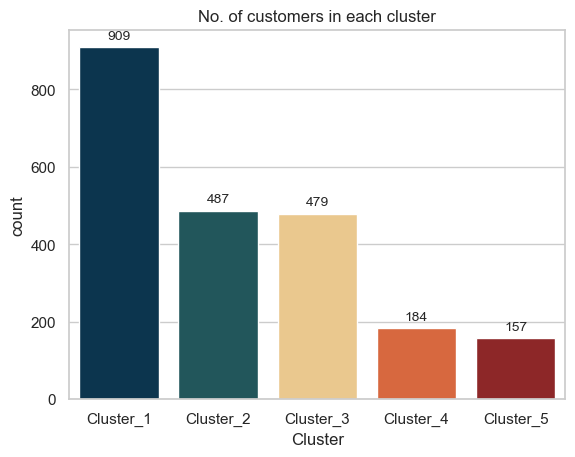

In [10]:
#For chart setting purpose
odr = [ 'Cluster_1', 'Cluster_2', 'Cluster_3','Cluster_4', 'Cluster_5']
colors = ["#013859", "#185E65",  "#F9CC7F", "#F15C25", "#9E1617"]

# Plotting a count plot
_chart = sns.countplot(x=df["Cluster"], palette= colors, order = odr);
annotation_fx(_chart)
_chart
plt.title("No. of customers in each cluster");

**Remarks**:

- Cluster 1 forms about 40% of the consumers
- Cluster 2 and 3 each forms about 20% of the consumers
- Cluster 4 and 5 together forms the remaining 20% of the consumers

||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Cluster size|~ 40%|~ 20%|~ 20%|~ 10%|~ 10%|

# PART 1: INCOME VS - EXPENDITURE, PLACE OF PURCHASE & CAMPAIGNS ACCEPTANCE

- Lets look at how a specific demographic feature - **Income** - related to the amount of purhcases, accepted offers and expenditure each consumer had.
- we will be looking at:
    - scatter plot
    - violin plot
    - box plot

In [11]:
df.groupby('Cluster')[['Income','TotalAMntspent','TotalNumPurchases','TotalCmpAccepted']].describe().round(2).T

Cluster                  Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5
Income            count     909.00     487.00     479.00     184.00     157.00
                  mean    36231.81   73338.56   57226.18   35837.49   80379.68
                  std     15623.15   11966.30   11117.03   13566.48   10974.42
                  min      3502.00    2447.00    4428.00    1730.00   46374.00
                  25%     26642.00   67066.50   50611.00   26561.50   75261.00
                  50%     34984.00   73170.00   57959.00   36748.00   81574.00
                  75%     44300.00   79778.50   64758.50   45296.25   87679.00
                  max    162397.00  160803.00  113734.00   72967.00  105471.00
TotalAMntspent    count     909.00     487.00     479.00     184.00     157.00
                  mean       97.80    1283.23     706.29     238.09    1588.04
                  std        88.83     378.61     308.54     261.77     445.76
                  min         5.00     461.00     215.00       8.00     416.00
                  25%        38.00     991.50     452.00      59.00    1298.00
                  50%        63.00    1231.00     635.00     118.00    1631.00
                  75%       133.00    1564.00     908.00     327.75    1902.00
                  max       711.00    2525.00    1804.00    1396.00    2525.00
TotalNumPurchases count     909.00     487.00     479.00     184.00     157.00
                  mean        5.94      19.77      17.12       8.27      19.55
                  std         2.43       4.15       3.98       5.02       4.32
                  min         0.00      10.00      10.00       0.00       9.00
                  25%         4.00      17.00      14.00       4.00      17.00
                  50%         6.00      20.00      16.00       7.00      19.00
                  75%         7.00      23.00      20.00      11.00      22.00
                  max        14.00      32.00      28.00      23.00      31.00
TotalCmpAccepted  count     909.00     487.00     479.00     184.00     157.00
                  mean        0.01       0.33       0.26       1.28       2.96
                  std         0.10       0.53       0.50       0.53       0.94
                  min         0.00       0.00       0.00       0.00       2.00
                  25%         0.00       0.00       0.00       1.00       2.00
                  50%         0.00       0.00       0.00       1.00       3.00
                  75%         0.00       1.00       0.00       2.00       4.00
                  max         1.00       2.00       2.00       3.00       5.00

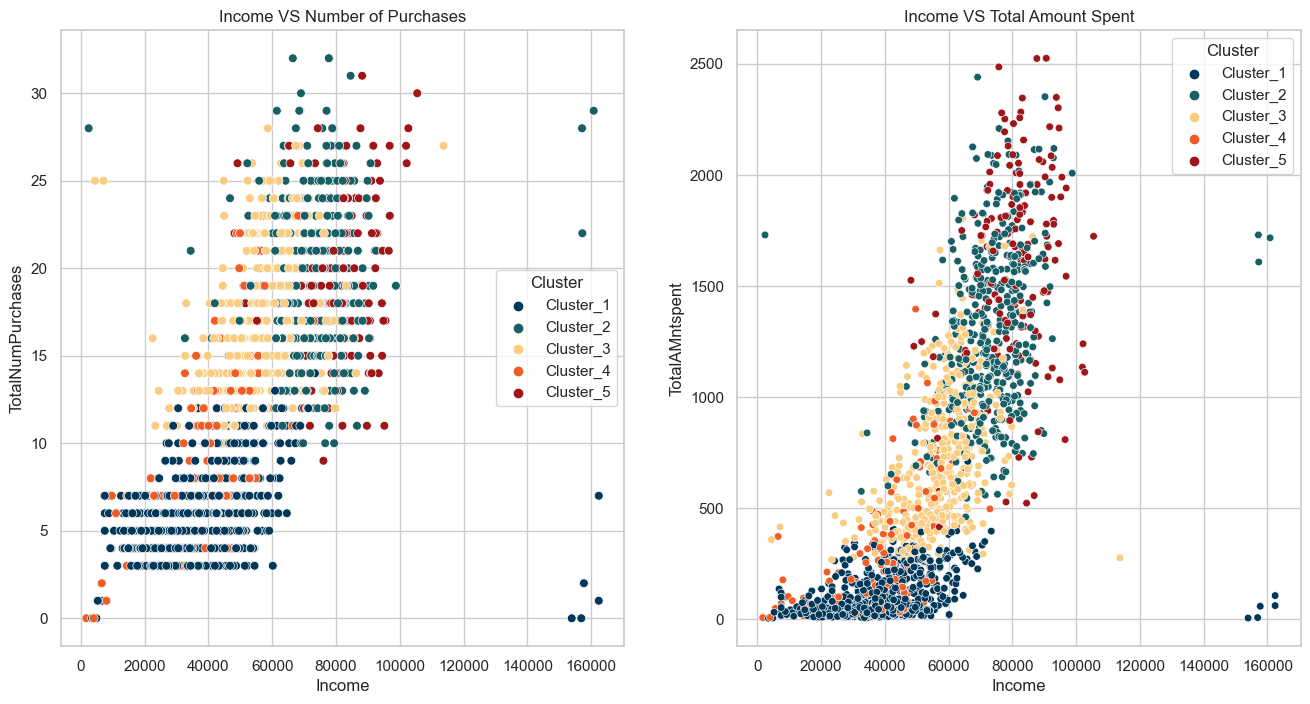

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.scatterplot(data = df,
                x = 'Income',
                y = 'TotalNumPurchases',
                hue = 'Cluster',
                palette = colors,
                s = 40,
                ax = axes[0],
                hue_order=odr);

axes[0].set_title('Income VS Number of Purchases')

sns.scatterplot(data = df,
                x = 'Income',
                y = 'TotalAMntspent',
                hue = 'Cluster',
                palette = colors,
                s = 30,
                ax = axes[1],
                hue_order=odr);
axes[1].set_title('Income VS Total Amount Spent');


**Comments**<br>
Generally, consumers with higher income have higher income have higher Number of Purchases and Amount 

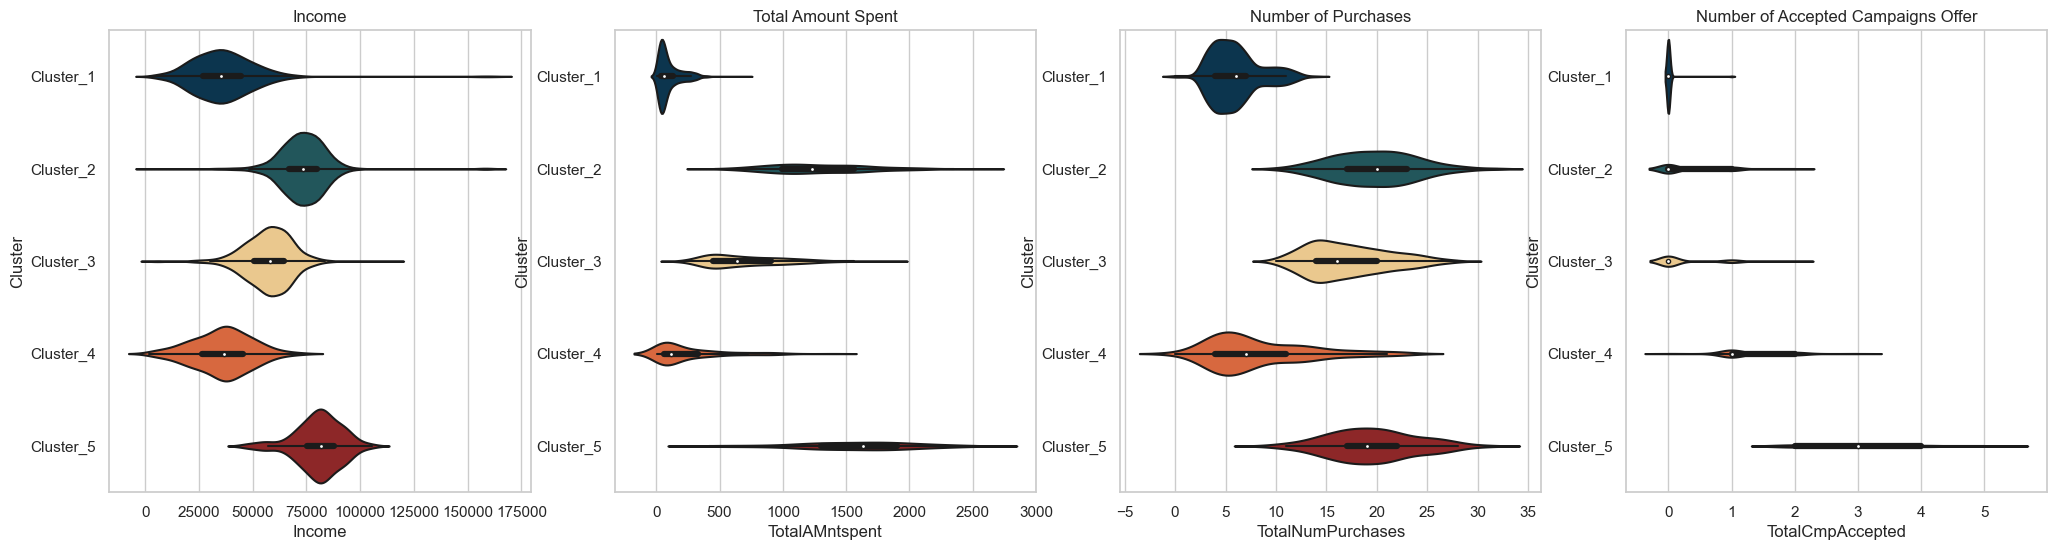

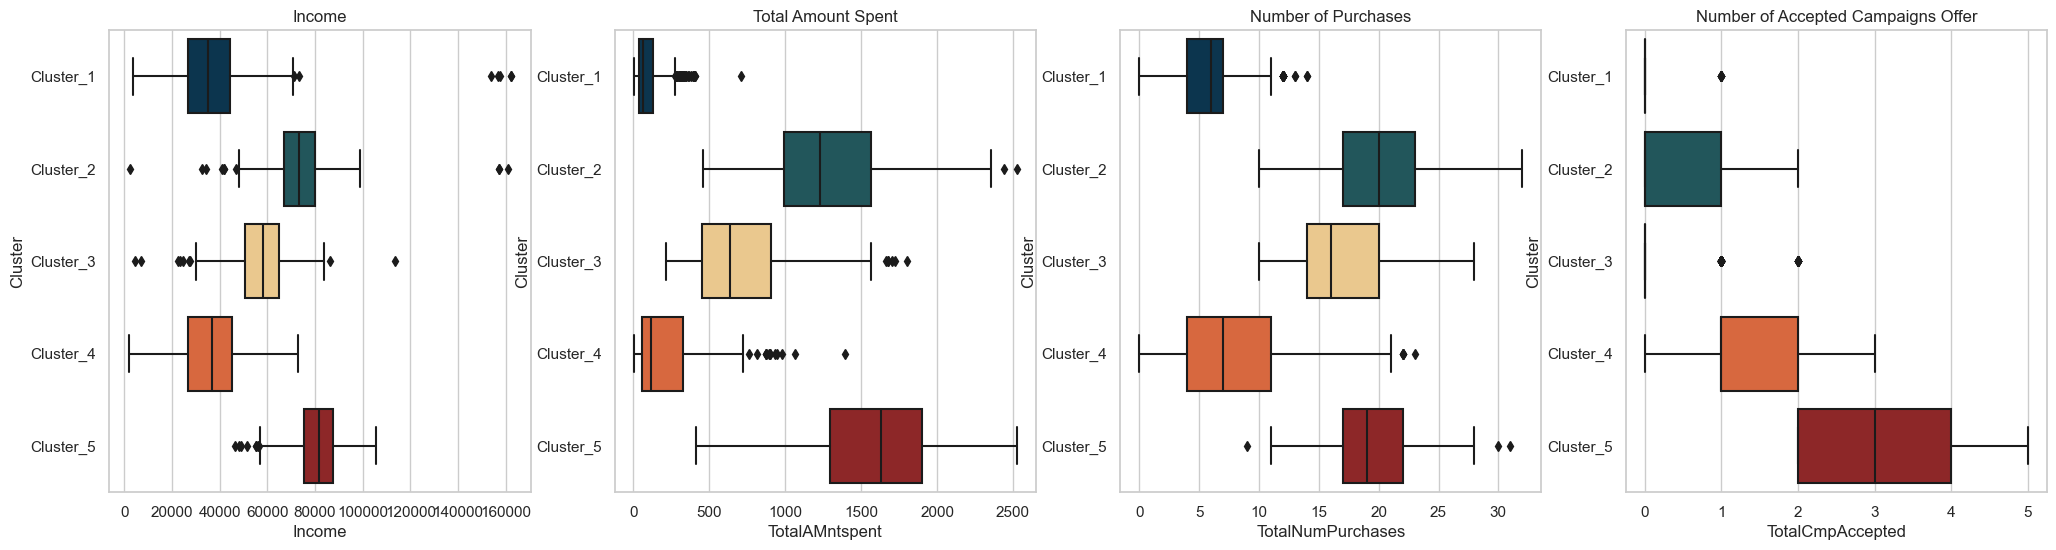

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 6))

sns.violinplot(data = df,
              x = 'Income',
              y = 'Cluster',
              palette = colors,
               orient = 'h',
              ax=axes[0],
              order = odr);
axes[0].set_title('Income')


sns.violinplot(data = df,
              x = 'TotalAMntspent',
              y = 'Cluster',
              palette = colors,
               orient = 'h',
              ax=axes[1],
              order = odr);
axes[1].set_title('Total Amount Spent')


sns.violinplot(data = df,
              x = 'TotalNumPurchases',
              y = 'Cluster',
              palette = colors,
               orient = 'h',
              ax=axes[2],
              order = odr);
axes[2].set_title('Number of Purchases');

sns.violinplot(data = df,
              x = 'TotalCmpAccepted',
              y = 'Cluster',
              palette = colors,
               orient = 'h',
              ax=axes[3],
              order = odr);
axes[3].set_title('Number of Accepted Campaigns Offer');

plt.show();

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 6))

sns.boxplot(data = df,
              x = 'Income',
              y = 'Cluster',
              palette = colors,
               orient = 'h',
              ax=axes[0],
              order = odr);
axes[0].set_title('Income')


sns.boxplot(data = df,
              x = 'TotalAMntspent',
              y = 'Cluster',
              palette = colors,
               orient = 'h',
              ax=axes[1],
              order = odr);
axes[1].set_title('Total Amount Spent')


sns.boxplot(data = df,
              x = 'TotalNumPurchases',
              y = 'Cluster',
              palette = colors,
               orient = 'h',
              ax=axes[2],
              order = odr);
axes[2].set_title('Number of Purchases');

sns.boxplot(data = df,
              x = 'TotalCmpAccepted',
              y = 'Cluster',
              palette = colors,
               orient = 'h',
              ax=axes[3],
              order = odr);
axes[3].set_title('Number of Accepted Campaigns Offer');

#### Remarks

||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Cluster size|~ 40%|~ 20%|~ 20%|~ 10%|~ 10%|
|Income|<li>Dominantly lower income <li>IQR about &dollar;25K - 45K<li>Highest income customers present|<li>Dominantly higher income <li>IQR about &dollar;65K - 80K<li>Highest income customers present<li>Lowest income customer present|<li>Dominantly moderate income <li>IQR about &dollar;50K - 65K<li>Lowest income customer present|<li>Dominantly lower income <li>IQR about &dollar;25K - 45K|<li>Cluster with dominantly highest income <li>IQR about &dollar;75K - 85K|
|Expenditure|Lowest spenders IQR 50-150|Higher spenders IQR 1K-1.5K|Moderate spenders IQR 500-1K|Low spenders IQR 60-300|Highest spenders IQR 1.3K-2K|
|Number of Purchases|<li>Lowest no. of purchase <li>IQR 4-7 <li>Mininum purchase = 0|<li>Higher no. of purchase <li>IQR 17-23 <li>Mininum purchase = 10|<li>Higher no. of purchase <li>IQR 14-20 <li>Mininum purchase = 10|<li>Lower no. of purchase <li>IQR 4-11 <li>Mininum purchase = 0|<li>Higher no. of purchase <li>IQR 17-22 <li>Mininum purchase = 9|
|Number of Accepted Campaign Offers|Majority 0|Majority 0|Majority 0|Majority 1 to 2 acceptance|Majority 2 to 4 acceptance|

    
    
Some unique individuals:
- As seen in Cluster 1: several customers have high income >150K but have consumer behaviour similar to the lowest income group individuals
- As seen in Cluster 2: several customers have lowest income <500 but have consumer behaviour similar to the higher income group individuals


# PART 2: DEMOGRAPHIC

## 2.1 Kid & Teens

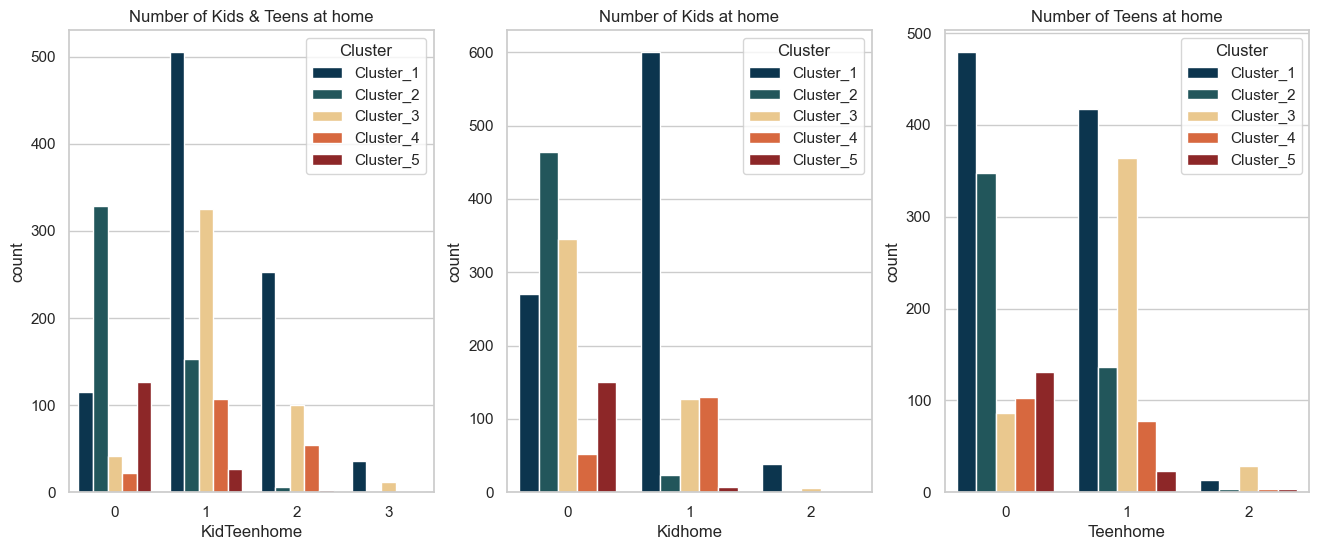

In [14]:
#Chart plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

#KIDS AND TEENS AT HOME
sns.countplot(data = df,
              hue = 'Cluster',
              hue_order= odr,
              x = 'KidTeenhome',
              palette = colors,
              ax = axes[0] );
axes[0].set_title('Number of Kids & Teens at home')


sns.countplot(data = df,
              hue = 'Cluster',
              hue_order= odr,
              x = 'Kidhome',
              palette = colors,
              ax = axes[ 1] );
axes[1].set_title('Number of Kids at home')


sns.countplot(data = df,
              hue = 'Cluster',
              hue_order= odr,
              x = 'Teenhome',
              palette = colors,
              ax = axes[2] );
axes[2].set_title('Number of Teens at home');

In [15]:
df.groupby('Cluster')['KidTeenhome'].value_counts(normalize=True, sort=False).round(2)
df.groupby('Cluster')['Kidhome'].value_counts(normalize=True, sort=False).round(2)
df.groupby('Cluster')['Teenhome'].value_counts(normalize=True, sort=False).round(2)

Cluster    KidTeenhome
Cluster_1  0              0.13
           1              0.56
           2              0.28
           3              0.04
Cluster_2  0              0.67
           1              0.31
           2              0.01
Cluster_3  0              0.09
           1              0.68
           2              0.21
           3              0.03
Cluster_4  0              0.12
           1              0.58
           2              0.29
           3              0.01
Cluster_5  0              0.80
           1              0.17
           2              0.02
           3              0.01
Name: KidTeenhome, dtype: float64

Cluster    Kidhome
Cluster_1  0          0.30
           1          0.66
           2          0.04
Cluster_2  0          0.95
           1          0.05
Cluster_3  0          0.72
           1          0.27
           2          0.01
Cluster_4  0          0.28
           1          0.71
           2          0.01
Cluster_5  0          0.96
           1          0.04
Name: Kidhome, dtype: float64

Cluster    Teenhome
Cluster_1  0           0.53
           1           0.46
           2           0.01
Cluster_2  0           0.71
           1           0.28
           2           0.01
Cluster_3  0           0.18
           1           0.76
           2           0.06
Cluster_4  0           0.56
           1           0.42
           2           0.02
Cluster_5  0           0.83
           1           0.15
           2           0.02
Name: Teenhome, dtype: float64

#### Remarks

||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Cluster size|~ 40%|~ 20%|~ 20%|~ 10%|~ 10%|
|Income|Lowest|High|Moderate|Low|Highest|
|Expenditure|Lowest|Higher|Moderate|Low|Highest|
|Number of Purchases|Lowest|High|High|Low|High|
|Number of Accepted Campaign Offers|Majority 0|Majority 0|Majority 0|Majority 1-2|Majority 2-4|
|Kids & Teens|<li>~ 47% have 1-2 Teens<li>~70% have 1-2 Kids|<li>Dominantly no kids or teens|<li>Dominantly no kids<li> Dominantly have 1 Teen|<li>Dominantly 1-2 kids <li>~45% 1 Teen|<li>Dominantly no kids or teens|


## 2.2 Education & Relationship status

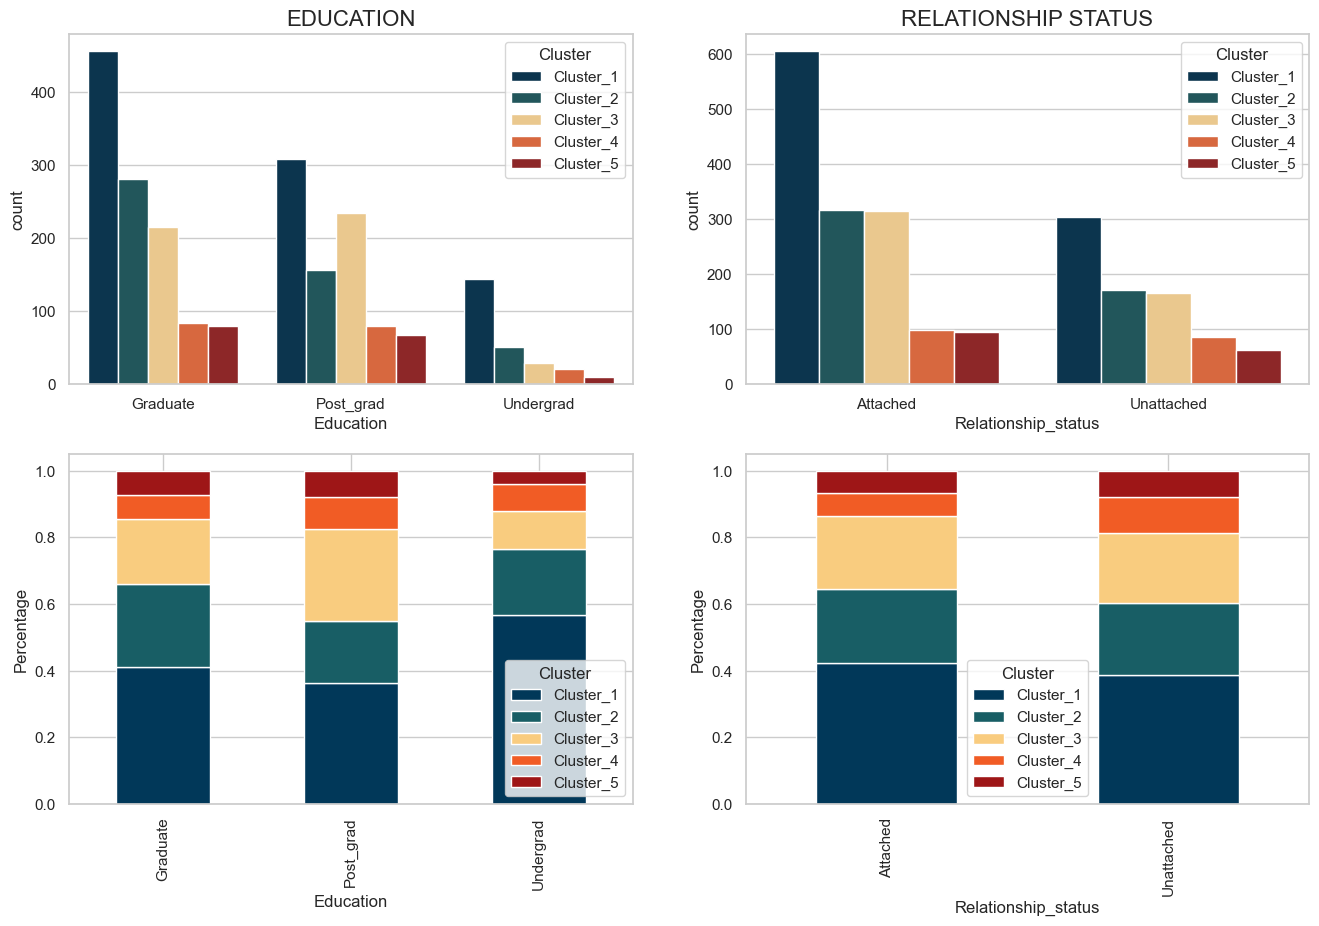

In [16]:
#Chart plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
# EDUCATION AND R/S STATUS
sns.countplot(data = df,
              hue = 'Cluster',
              hue_order= odr,
              x = 'Education',
              palette = colors,
              ax = axes[0,0]);

sns.countplot(data = df,
              hue = 'Cluster',
              hue_order= odr,
              x = 'Relationship_status',
              palette = colors,
              ax = axes[0, 1],
              order = ['Attached','Unattached']);

cluster_perc_Edu = df.groupby('Education')['Cluster'].value_counts(normalize=True).unstack()

cluster_perc_Edu.plot(kind='bar',
                          stacked=True,
                          color = colors,
                          ax = axes[1,0]);

cluster_perc_Rs = df.groupby('Relationship_status')['Cluster'].value_counts(normalize=True).unstack()
cluster_perc_Rs.plot(kind='bar',
                          stacked=True,
                          color = colors,
                          ax = axes[1,1]);


axes[0,0].set_title('EDUCATION',fontsize=16)
axes[0,1].set_title('RELATIONSHIP STATUS',fontsize=16)


axes[1,0].set_ylabel('Percentage')
axes[1,1].set_ylabel('Percentage');


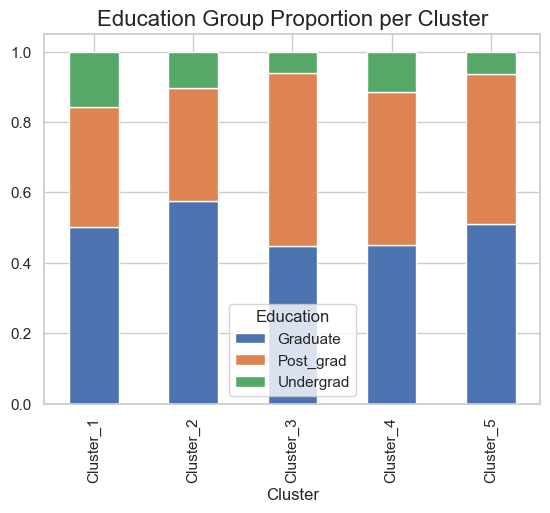

In [20]:
edu_per_cluster = df.groupby('Cluster')['Education'].value_counts(normalize=True).unstack()
edu_per_cluster.plot(kind='bar',
                     stacked=True)
plt.title("Education Group Proportion per Cluster",fontsize = 16);

In [18]:
df.groupby('Cluster')['Education'].value_counts(normalize=True, sort=False).round(2)
df.groupby('Cluster')['Relationship_status'].value_counts(normalize=True, sort=False).round(2)

Cluster    Education
Cluster_1  Graduate     0.50
           Post_grad    0.34
           Undergrad    0.16
Cluster_2  Graduate     0.58
           Post_grad    0.32
           Undergrad    0.10
Cluster_3  Graduate     0.45
           Post_grad    0.49
           Undergrad    0.06
Cluster_4  Graduate     0.45
           Post_grad    0.43
           Undergrad    0.11
Cluster_5  Graduate     0.51
           Post_grad    0.43
           Undergrad    0.06
Name: Education, dtype: float64

Cluster    Relationship_status
Cluster_1  Attached               0.67
           Unattached             0.33
Cluster_2  Attached               0.65
           Unattached             0.35
Cluster_3  Attached               0.66
           Unattached             0.34
Cluster_4  Attached               0.54
           Unattached             0.46
Cluster_5  Attached               0.61
           Unattached             0.39
Name: Relationship_status, dtype: float64

#### Remarks

*EDUCATION*
>**Undergrads**
> - Smallest education group in all clusters (typically <10%)
> - ~60 % of undergrads found in Cluster 1 (forms 15% of Cluster 1)

>**Graduates**
> - Largest education group in all clusters except Cluster 3

>**Post-grad**
> - Typically makes up about 35-45% of each cluster
> - Largest education group in Cluster 3 (49%)
> - Makes up less of the Cluster 2 (34%) and Cluster 3 (32%)

>**Across Clusters**
> - While all clusters observe less the 10% undergrads, Cluster 1 have 15% Undergrads
> - Cluster 1 and 2 observe distintly more Graduates than Post-graduates
> - Cluster 3,4,5 observe relatively similar proportion of Graduates and Post-grads
> - with Cluster 3 observing more Post-grads than Graduates

*RELATIONSHIP*
> - All clusters observe dominantly Attached individuals
> - Cluster 1,2 and 3 have much higher proportiong of Attached vs Un-attached individuals (65% or more)

||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Cluster size|~ 40%|~ 20%|~ 20%|~ 10%|~ 10%|
|Income|Lowest|High|Moderate|Low|Highest|
|Expenditure|Lowest|Higher|Moderate|Low|Highest|
|Number of Purchases|Lowest|High|High|Low|High|
|Number of Accepted Campaign Offers|Majority 0|Majority 0|Majority 0|Majority 1-2|Majority 2-4|
|Kids & Teens|<li>~ 47% have 1-2 Teens<li>~70% have 1-2 Kids|<li>Dominantly no kids or teens|<li>Dominantly no kids<li> Dominantly have 1 Teen|<li>Dominantly 1-2 kids <li>~45% 1 Teen|<li>Dominantly no kids or teens|
|Education|<li>Undergrad 16% <li> Graduate >> Post_grad|<li>Undergrad 10% <li> Graduate >> Post_grad|<li>Undergrad 6% <li> Graduate ≈ Post_grad|<li>Undergrad 11% <li> Graduate ≈ Post_grad|<li>Undergrad 6% <li> Graduate >> Post_grad|
|Relationship|>65% Attached|>65% Attached|>65% Attached|54% Attached|61% Attached|

## 2.3 Age

#### **The Different Age Groups**<br>
*[Reference](https://www.beeliked.com/blog/audience-engagement/marketing-to-different-age-demographics)*

<code>Generation Z (Gen Z)</code>: 
- Born roughly between the mid-1990s to mid-2010s, 
- Gen Z is the youngest generation
- Characterized by being digital natives, highly tech-savvy, socially conscious, and diverse. 
- Known for their strong preferences for authenticity, individuality, and personalized experiences
- Tends to be heavily influenced by social media, and marketing efforts targeting this group often focus on social media platforms, online channels, and interactive and personalized content.

<code>Millennials (Generation Y)</code>: 
- Born roughly between the early 1980s to mid-1990s, 
- Known for being the first generation to grow up with widespread access to the internet and digital technology. 
- Characterized by being diverse, socially conscious, and value-driven. 
- Tend to prioritize experiences over material possessions, and marketing efforts targeting this group often focus on social media, digital platforms, influencer marketing, and experiential marketing.

<code>Generation X (Gen X)</code>: 
- Born roughly between the early 1960s to early 1980s
- Known for being a smaller generation sandwiched between the larger baby boomer and millennial generations.
- Tend to value independence, work-life balance, and pragmatism.
- May be more responsive to traditional marketing channels such as television, print media, and direct marketing, and may be influenced by factors such as family, career, and financial stability.

<code>Baby Boomers</code>: 
- Born roughly between the mid-1940s to mid-1960s
- Known for being a large and influential generation
- Tend to value stability, loyalty, and traditional values. Baby boomers may be more responsive to traditional marketing channels such as television, print media, and direct marketing, and may prioritize factors such as brand reputation, quality, and trust in their purchasing decisions.

<code>Born before 1940s</code><br>
- The "Mature" or "Senior" segment
- Often considered a distinct demographic segment due to their unique characteristics and purchasing patterns.
- They may have different lifestyle preferences, health considerations, and financial situations that influence their consumer behavior.
-  For example, they may prioritize products and services related to health care, retirement planning, and leisure activities, and may have specific preferences for communication channels, product features, pricing, and promotions.

#### Our Customers:
From earlier analysis, it is noted our customers were born between 1983 to 1996, with greater proportions of them born between 1940s - 1960s.
> In other words, we are looking at a Baby Boomer dominant customers group

In [18]:
z = 2014-1995 # Gen Z
y = 2014-1980 # Millenials 19 - 35
x = 2014-1960 # Gen X 35 - 55
w = 2014-1945 # Baby Boomers >55 - 69

print(f"""
In 2012, given the customers were born between 1980s-1996,
Millenials will be around {y} to {z} years old,
Baby Boomers will be around {y} to {x} years old,
Seniors will be around {x} and above.""")


In 2012, given the customers were born between 1980s-1996,
Millenials will be around 34 to 19 years old,
Baby Boomers will be around 34 to 54 years old,
Seniors will be around 54 and above.


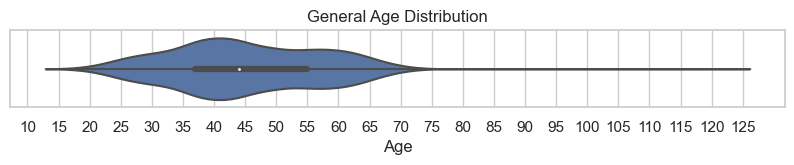

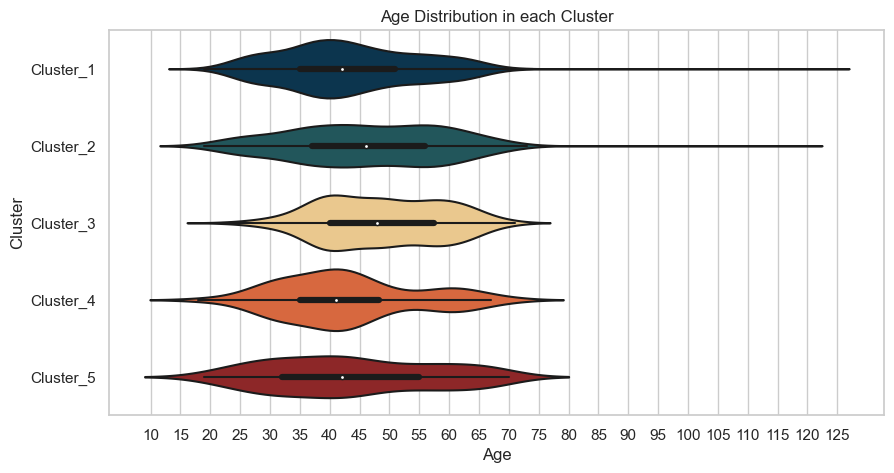

In [19]:
fig = plt.figure(figsize = (10,1))
sns.violinplot(data=df,
               x="Age",
               orient= 'h');
plt.title('General Age Distribution')
plt.xticks(range(10,130,5))
plt.show();

fig = plt.figure(figsize = (10,5))
sns.violinplot(data=df,
               x="Age",
               y="Cluster",
               orient= 'h',
               palette = colors,
               order= odr);
plt.title('Age Distribution in each Cluster')
plt.xticks(range(10,130,5))
plt.show();

In [20]:
df.groupby('Cluster')['Age'].describe().round().T

Cluster,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
count,909.0,487.0,479.0,184.0,157.0
mean,43.0,46.0,49.0,43.0,44.0
std,12.0,13.0,10.0,12.0,14.0
min,19.0,19.0,22.0,18.0,19.0
25%,35.0,37.0,40.0,35.0,32.0
50%,42.0,46.0,48.0,41.0,42.0
75%,51.0,56.0,58.0,48.0,55.0
max,121.0,115.0,71.0,71.0,70.0


#### Remarks

**General Comment**<br>
There does not appear to have significant differences in the age distribution across the clusters that is meaningful for subsequent marketing strategies planning.

||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Cluster size|~ 40%|~ 20%|~ 20%|~ 10%|~ 10%|
|Income|Lowest|High|Moderate|Low|Highest|
|Expenditure|Lowest|Higher|Moderate|Low|Highest|
|Number of Purchases|Lowest|High|High|Low|High|
|Number of Accepted Campaign Offers|Majority 0|Majority 0|Majority 0|Majority 1-2|Majority 2-4|
|Kids & Teens|<li>~ 47% have 1-2 Teens<li>~70% have 1-2 Kids|<li>Dominantly no kids or teens|<li>Dominantly no kids<li> Dominantly have 1 Teen|<li>Dominantly 1-2 kids <li>~45% 1 Teen|<li>Dominantly no kids or teens|
|Education|<li>Undergrad 16% <li> Graduate >> Post_grad|<li>Undergrad 10% <li> Graduate >> Post_grad|<li>Undergrad 6% <li> Graduate ≈ Post_grad|<li>Undergrad 11% <li> Graduate ≈ Post_grad|<li>Undergrad 6% <li> Graduate >> Post_grad|
|Relationship|>65% Attached|>65% Attached|>65% Attached|54% Attached|61% Attached|
|Age<br>*No significant difference between clusters*||||||

# PART 3: CONSUMER BEHAVIOUR

## 3.1 Places of Purchase

### 3.1.1 Compare <code>among</code> the clusters, the difference in purchases at each location

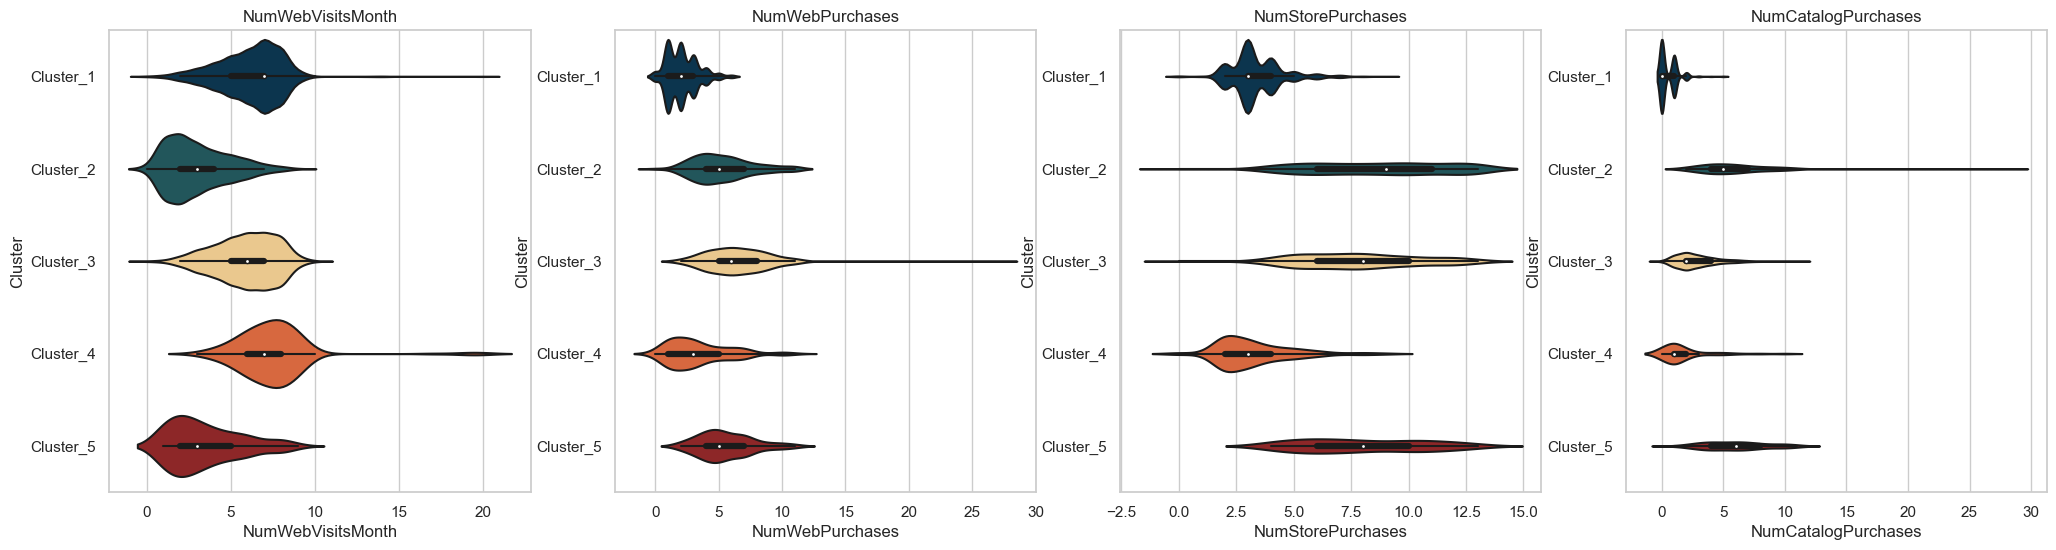

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 6))

sns.violinplot(data = df,
               x = 'NumWebVisitsMonth',
               y = 'Cluster',
               palette = colors,
               orient = 'h',
               ax=axes[0],
               order= odr);
axes[0].set_title('NumWebVisitsMonth')


sns.violinplot(data = df,
               x = 'NumWebPurchases',
               y = 'Cluster',
               palette = colors,
               orient = 'h',
               ax=axes[1],
               order= odr);
axes[1].set_title('NumWebPurchases')


sns.violinplot(data = df,
               x = 'NumStorePurchases',
               y = 'Cluster',
               palette = colors,
               orient = 'h',
               ax=axes[2],
               order= odr);
axes[2].set_title('NumStorePurchases');

sns.violinplot(data = df,
               x = 'NumCatalogPurchases',
               y = 'Cluster',
               palette = colors,
               orient = 'h',
               ax=axes[3],
               order= odr);
axes[3].set_title('NumCatalogPurchases');

**Comments**<br>
Comparing <code>across</code> clusters:<br>
Based on the number of purchases IQR of each cluster at each platform, we label them *Low, Moderate, High*:
- IQR > 5: High
- IQR on 5: Moderate
- IQR < 5: Low
||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|----|----|----|----|----|----|
|Purchasing Platform|<li>*WEB visit*: High<li>*WEB Purch*: Low <li>*STORE*: Low <li>*CATALOG*: Low|<li>*WEB visit*: Low <li>*WEB Purch*: Mod <li>*STORE*: High <li>*CATALOG*: Mod|<li>*WEB visit*: High <li>*WEB Purch*: High <li>*STORE*: High <li>*CATALOG*: Low|<li>*WEB visit*: High <li>*WEB Purch*: Low <li>*STORE*: Low <li>*CATALOG*: Low|<li>*WEB visit*: Low <li>*WEB Purch*: Mod <li>*STORE*: High <li>*CATALOG*: Mod|

### 3.1.2 Compare <code>within</code> the clusters, the difference in purchases at each location

In [22]:
#list of columns of interest for analysis
_col = [col for col in df.columns if ('Num' in col) & ('Purch' in col) & ('Deals' not in col)]
_col.append("Cluster")

In [23]:
_col

['NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'TotalNumPurchases',
 'Cluster']

In [24]:
purch_df = df.copy()
purch_df = purch_df.loc[:,_col]
purch_df.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalNumPurchases,Cluster
0,8,10,4,22,Cluster_2
1,1,1,2,4,Cluster_1
2,8,2,10,20,Cluster_3
3,2,0,4,6,Cluster_1
4,5,3,6,14,Cluster_3


In [25]:
_location = ["Web", "Catalog", "Store"]
for place in _location:
    new_colname = f"Perc{place}Purchases"
    old_colname = f"Num{place}Purchases"
    purch_df[new_colname] = (purch_df[old_colname] / purch_df["TotalNumPurchases"])*100

In [26]:
purch_df.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalNumPurchases,Cluster,PercWebPurchases,PercCatalogPurchases,PercStorePurchases
0,8,10,4,22,Cluster_2,36.363636,45.454545,18.181818
1,1,1,2,4,Cluster_1,25.000000,25.000000,50.000000
2,8,2,10,20,Cluster_3,40.000000,10.000000,50.000000
3,2,0,4,6,Cluster_1,33.333333,0.000000,66.666667
4,5,3,6,14,Cluster_3,35.714286,21.428571,42.857143


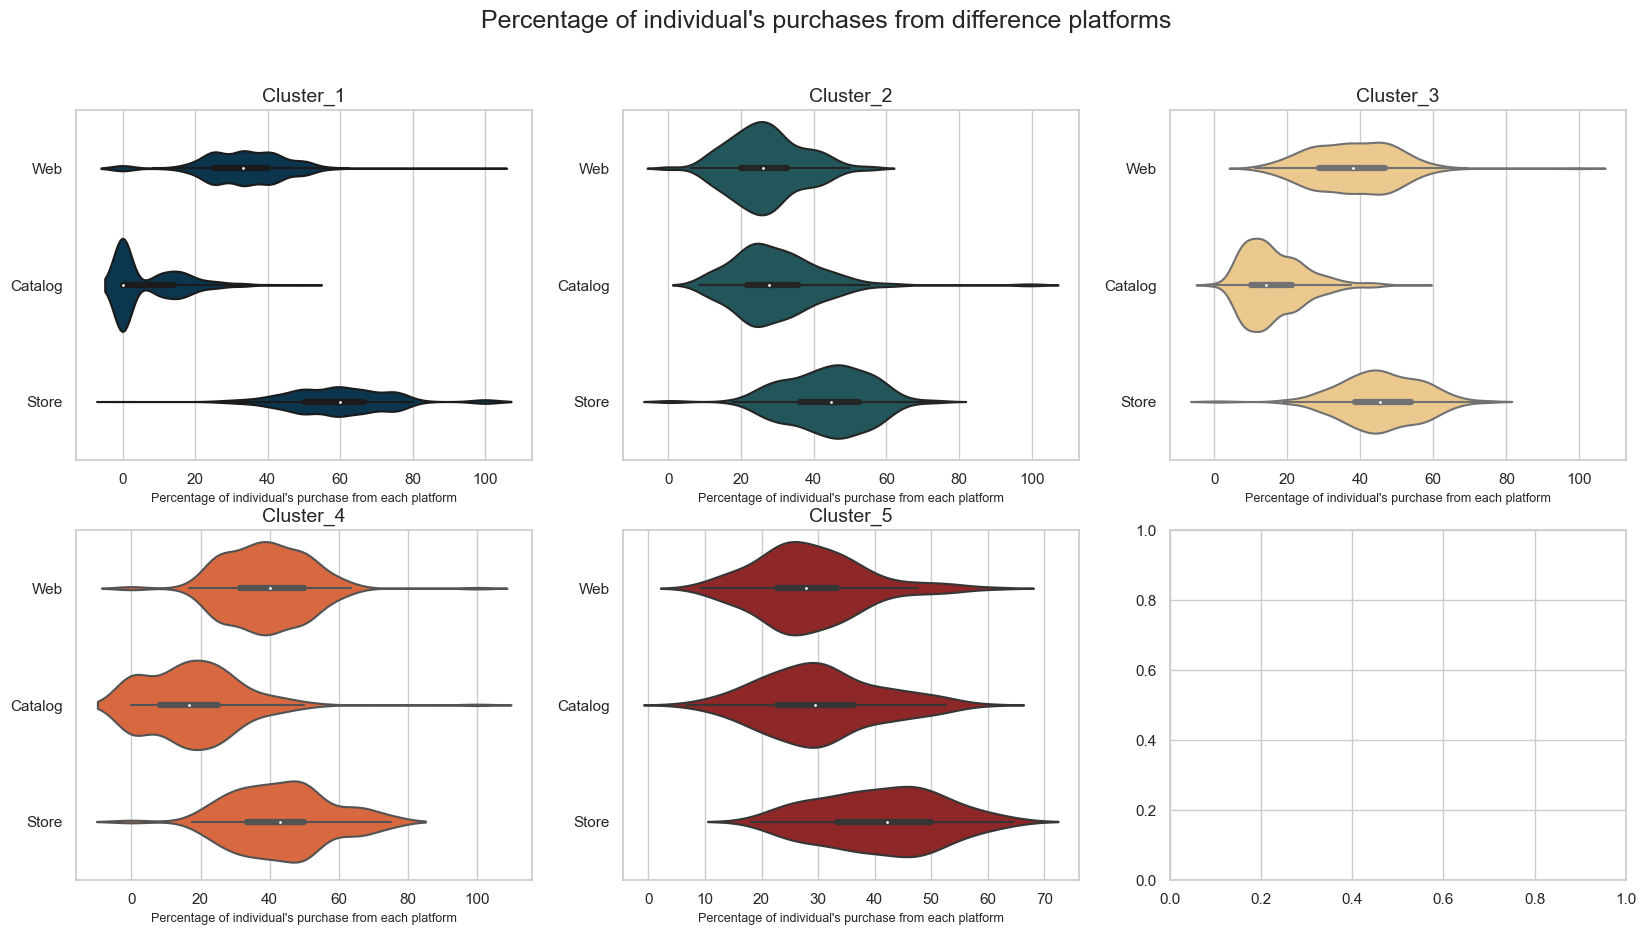

In [27]:
_col = [col for col in purch_df.columns if 'Perc' in col]
yticks = ["Web", "Catalog", "Store"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

_ = purch_df.loc[purch_df['Cluster']=='Cluster_1',_col,]
sns.violinplot(data = _,
               ax=axes[0,0], 
               orient = 'h',
               color=colors[0])

_ = purch_df.loc[purch_df['Cluster']=='Cluster_2', _col]
sns.violinplot(data = _,
               ax=axes[0,1], 
               orient = 'h',
               color=colors[1])

_ = purch_df.loc[purch_df['Cluster']=='Cluster_3', _col]
sns.violinplot(data = _,
               ax=axes[0,2], 
               orient = 'h',
               color=colors[2])

_ = purch_df.loc[purch_df['Cluster']=='Cluster_4', _col]
sns.violinplot(data = _,
               ax=axes[1,0], 
               orient = 'h',
               color=colors[3])

_ = purch_df.loc[purch_df['Cluster']=='Cluster_5', _col]
sns.violinplot(data = _,
               ax=axes[1,1], 
               orient = 'h',
               color=colors[4])


axes[0, 0].set_yticklabels(yticks)
axes[0, 1].set_yticklabels(yticks)
axes[0, 2].set_yticklabels(yticks)
axes[1, 0].set_yticklabels(yticks)
axes[1, 1].set_yticklabels(yticks)


axes[0, 0].set_title("Cluster_1", fontsize = 14)
axes[0, 1].set_title("Cluster_2", fontsize = 14)
axes[0, 2].set_title("Cluster_3", fontsize = 14)
axes[1, 0].set_title("Cluster_4", fontsize = 14)
axes[1, 1].set_title("Cluster_5", fontsize = 14)

x_label = "Percentage of individual's purchase from each platform"
axes[0, 0].set_xlabel(x_label, fontsize = 9)
axes[0, 1].set_xlabel(x_label, fontsize = 9)
axes[0, 2].set_xlabel(x_label, fontsize = 9)
axes[1, 0].set_xlabel(x_label, fontsize = 9)
axes[1, 1].set_xlabel(x_label, fontsize = 9)

fig.suptitle("Percentage of individual's purchases from difference platforms", fontsize = 18);

#### Remarks

*Generally*<br>
Comparing <code>across</code> clusters:<br>
Based on the number of purchases IQR of each cluster at each platform, we label them *Low, Moderate, High*:
- IQR > 5: High
- IQR on 5: Moderate
- IQR < 5: Low

Comparing <code>within</code> clusters:<br>
- Store is more common place of purchase across the clusters
- Catalog is least common place of purchase across clusters
- Cluster's Low/Moderate/High level of purchase in each location generally mimics their total level of total purchase


||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Cluster size|~ 40%|~ 20%|~ 20%|~ 10%|~ 10%|
|Income|Lowest|High|Moderate|Low|Highest|
|Expenditure|Lowest|Higher|Moderate|Low|Highest|
|Number of Purchases|Lowest|High|High|Low|High|
|Number of Accepted Campaign Offers|Majority 0|Majority 0|Majority 0|Majority 1-2|Majority 2-4|
|Kids & Teens|<li>~ 47% have 1-2 Teens<li>~70% have 1-2 Kids|<li>Dominantly no kids or teens|<li>Dominantly no kids<li> Dominantly have 1 Teen|<li>Dominantly 1-2 kids <li>~45% 1 Teen|<li>Dominantly no kids or teens|
|Education|<li>Undergrad 16% <li> Graduate >> Post_grad|<li>Undergrad 10% <li> Graduate >> Post_grad|<li>Undergrad 6% <li> Graduate ≈ Post_grad|<li>Undergrad 11% <li> Graduate ≈ Post_grad|<li>Undergrad 6% <li> Graduate >> Post_grad|
|Relationship|>65% Attached|>65% Attached|>65% Attached|54% Attached|61% Attached|
|Age<br>*No significant difference between clusters*||||||
|Purchasing Platform|<li>*WEB visit*: High<li>*WEB Purch*: Low <li>*STORE*: Low <li>*CATALOG*: Low<li>Catalog < Web < Store|<li>*WEB visit*: Low <li>*WEB Purch*: Mod <li>*STORE*: High <li>*CATALOG*: Mod<li>Catalog ≈ Web < Store|<li>*WEB visit*: High <li>*WEB Purch*: High <li>*STORE*: High <li>*CATALOG*: Low<li>Catalog < Web ≈ Store|<li>*WEB visit*: High <li>*WEB Purch*: Low <li>*STORE*: Low <li>*CATALOG*: Low<li>Catalog < Web ≈ Store|<li>*WEB visit*: Low <li>*WEB Purch*: Mod <li>*STORE*: High <li>*CATALOG*: Mod<li>Catalog ≈ Web < Store|

## 3.2 Product Spending

### 3.2.1 Compare <code>among</code> the clusters, the difference in product expenditures

In [28]:
prod_col = [col for col in df.columns if ('Mnt' in col) & ('AMnt' not in col)]
prod_col

['MntWinesProducts',
 'MntFruitsProducts',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProducts']

In [29]:
#lets first look at the general median expenditure for each product type
df[prod_col].median()

MntWinesProducts     174.5
MntFruitsProducts      8.0
MntMeatProducts       68.0
MntFishProducts       12.0
MntSweetProducts       8.0
MntGoldProducts       24.5
dtype: float64

In [30]:
#lets now look at the general mean expenditure for each product type
df[prod_col].mean().round()

MntWinesProducts     305.0
MntFruitsProducts     26.0
MntMeatProducts      167.0
MntFishProducts       38.0
MntSweetProducts      27.0
MntGoldProducts       44.0
dtype: float64

In [31]:
#lets now look at the statistical description of the expenditure for each product type of in each cluster

## prod_col is a list of the 6 diff product types
prod_col = [col for col in df.columns if 'Mnt' in col]
prod_col.remove('TotalAMntspent')

_test_ = df.groupby('Cluster')[prod_col].describe().round(2).T

for n in range(0,len(_test_),8):
    print(_test_.iloc[[n+1,n+4,n+5,n+6]])
    print("\n")


Cluster                Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5
MntWinesProducts mean       43.6     531.24      451.8     122.07     884.49
                 25%         8.0     332.00      251.0      12.75     693.00
                 50%        22.0     483.00      399.0      43.50     938.00
                 75%        57.0     709.00      620.0     159.75    1111.00


Cluster                 Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5
MntFruitsProducts mean       5.08      71.43      20.18       7.63      50.52
                  25%        0.00      30.00       4.00       1.00      17.00
                  50%        2.00      61.00      12.00       3.00      28.00
                  75%        6.00     106.00      28.00      10.00      68.00


Cluster               Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5
MntMeatProducts mean      22.86     428.43     130.43      48.46     441.06
                25%        7.00     252.50      69.00      11.75     

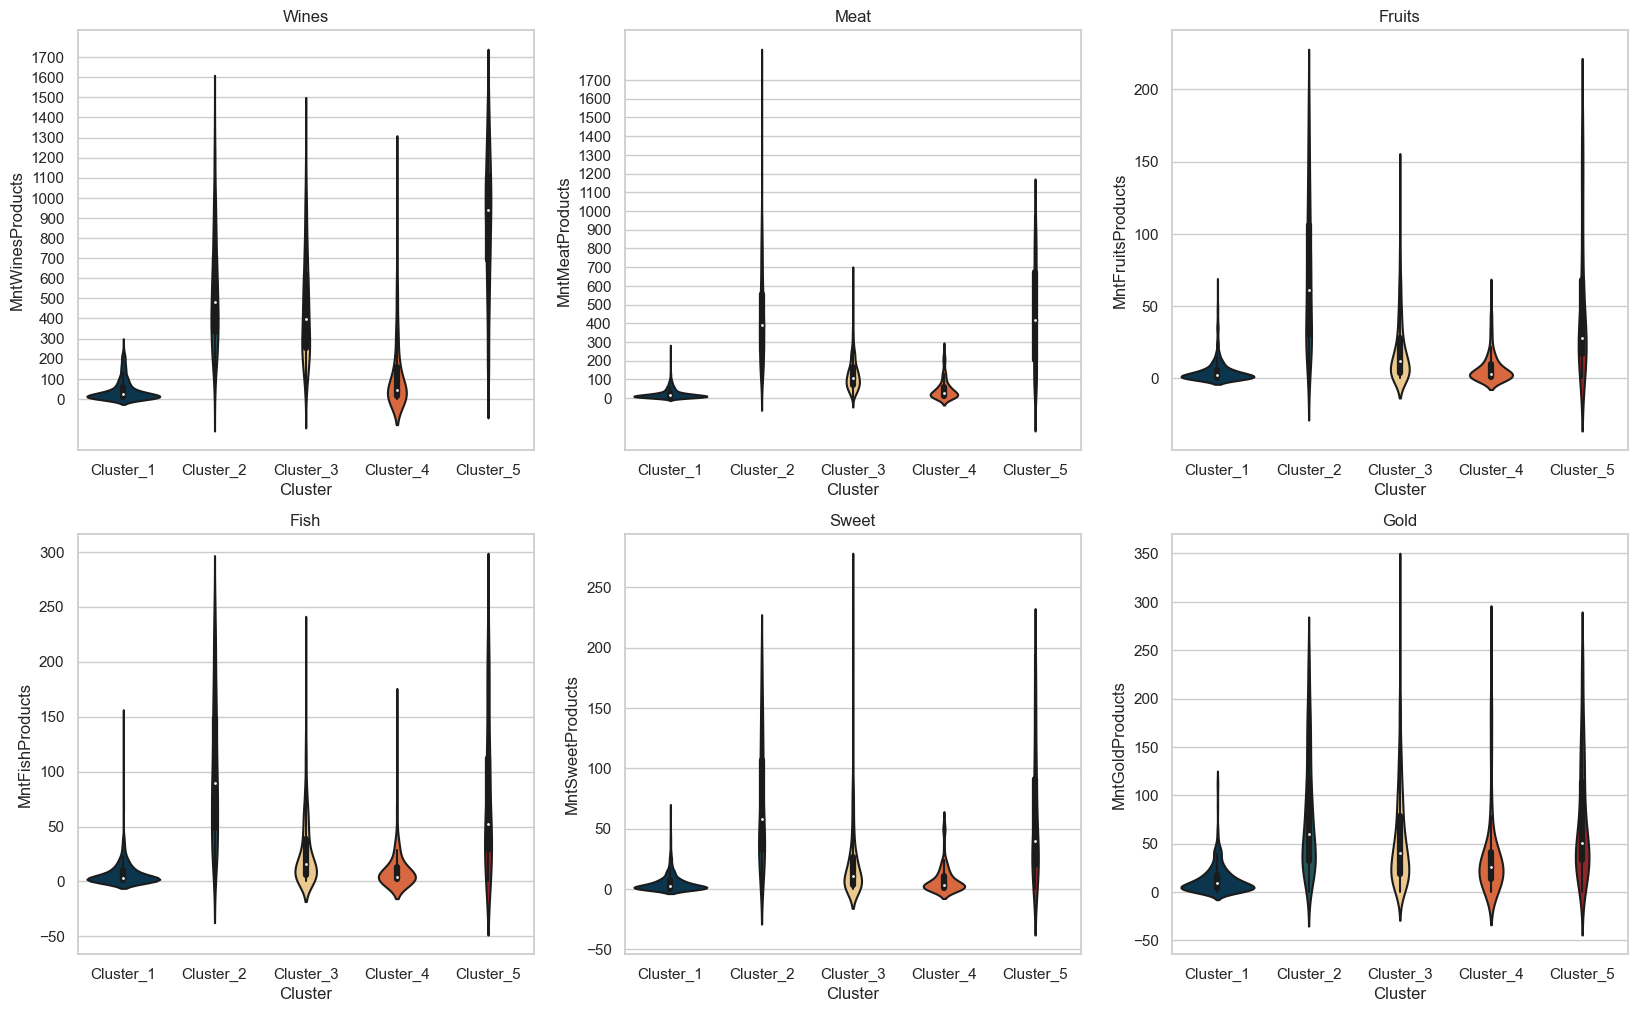

In [32]:
#lets plot distribution charts of the different product expenses by each cluster
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

sns.violinplot(data = df,
               y ='MntWinesProducts',
               x = 'Cluster',
               palette = colors,
               ax=axes[0,0],
               order= odr);
axes[0,0].set_title('Wines')
axes[0,0].set_yticks(range(0,1800,100))


sns.violinplot(data = df,
               y ='MntMeatProducts',
               x = 'Cluster',
               palette = colors,
               ax=axes[0,1],
               order= odr);
axes[0,1].set_title('Meat')
axes[0,1].set_yticks(range(0,1800,100))

sns.violinplot(data = df,
               y ='MntFruitsProducts',
               x = 'Cluster',
               palette = colors,
               ax=axes[0,2],
               order= odr);
axes[0,2].set_title('Fruits');

sns.violinplot(data = df,
               y ='MntFishProducts',
               x = 'Cluster',
               palette = colors,
               ax=axes[1,0],
               order= odr);
axes[1,0].set_title('Fish');

sns.violinplot(data = df,
               y ='MntSweetProducts',
               x = 'Cluster',
               palette = colors,
               ax=axes[1,1],
               order= odr);
axes[1,1].set_title('Sweet');

sns.violinplot(data = df,
               y ='MntGoldProducts',
               x = 'Cluster',
               palette = colors,
               ax=axes[1,2],
               order= odr);
axes[1,2].set_title('Gold');

**Comments**<br>

We compare each cluster IQR & Mean expenditure of each product type, to the general mean and median expenture value of each product type.
> *Example:*<br> Avg Wine expenditure is around 170 and Median is around 305.<br> The IQR Wine expenditure in Cluster 1 is 9-70, thus we label Cluster 1 Wine expenses *Below avg*

||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Product Expenses|<li>*WINE*: Below avg<li>*MEAT*: Below avg<li>*FRUITS*: Below avg<li>*FISH*: Below avg<li>*SWEET*: Below avg<li>*GOLD*: Below avg|<li>*WINE*: Above avg<li>*MEAT*: Above avg<li>*FRUITS*: Above avg<li>*FISH*: Above avg<li>*SWEET*:  Above avg<li>*GOLD*: Above avg|<li>*WINE*: Above avg<li>*MEAT*: Around avg<li>*FRUITS*: Around avg<li>*FISH*: Around avg<li>*SWEET*: Around avg<li>*GOLD*: Above avg|<li>*WINE*: Below avg<li>*MEAT*: Below avg<li>*FRUITS*: Below avg<li>*FISH*: Below avg<li>*SWEET*: Below avg<li>*GOLD*: Around avg|<li>*WINE*: Above avg<li>*MEAT*: Above avg<li>*FRUITS*: Above avg<li>*FISH*: Above avg<li>*SWEET*: Above avg<li>*GOLD*: Above avg|


### 3.2.2 Compare <code>witin</code> the clusters, the difference in product expenditures

In [33]:
#list of columns of interest for analysis
_col = [col for col in df.columns if ('Mnt' in col)]
_col.append("Cluster")

In [34]:
_col

['MntWinesProducts',
 'MntFruitsProducts',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProducts',
 'TotalAMntspent',
 'Cluster']

In [35]:
spent_df = df.copy()
spent_df = spent_df.loc[:,_col]
spent_df.head()

,MntWinesProducts,MntFruitsProducts,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,TotalAMntspent,Cluster
0,635,88,546,172,88,88,1617,Cluster_2
1,11,1,6,2,1,6,27,Cluster_1
2,426,49,127,111,21,42,776,Cluster_3
3,11,4,20,10,3,5,53,Cluster_1
4,173,43,118,46,27,15,422,Cluster_3


In [36]:
_product = ["Wines","Meat","Fish","Fruits","Sweet","Gold"]
for product in _product:
    new_colname = f"Perc{product}Expense"
    old_colname = f"Mnt{product}Products"
    spent_df[new_colname] = (spent_df[old_colname] / spent_df["TotalAMntspent"])*100

In [37]:
spent_df.head()

,MntWinesProducts,MntFruitsProducts,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,TotalAMntspent,Cluster,PercWinesExpense,PercMeatExpense,PercFishExpense,PercFruitsExpense,PercSweetExpense,PercGoldExpense
0,635,88,546,172,88,88,1617,Cluster_2,39.270254,33.766234,10.636982,5.442177,5.442177,5.442177
1,11,1,6,2,1,6,27,Cluster_1,40.740741,22.222222,7.407407,3.703704,3.703704,22.222222
2,426,49,127,111,21,42,776,Cluster_3,54.896907,16.365979,14.304124,6.314433,2.706186,5.412371
3,11,4,20,10,3,5,53,Cluster_1,20.754717,37.735849,18.867925,7.547170,5.660377,9.433962
4,173,43,118,46,27,15,422,Cluster_3,40.995261,27.962085,10.900474,10.189573,6.398104,3.554502


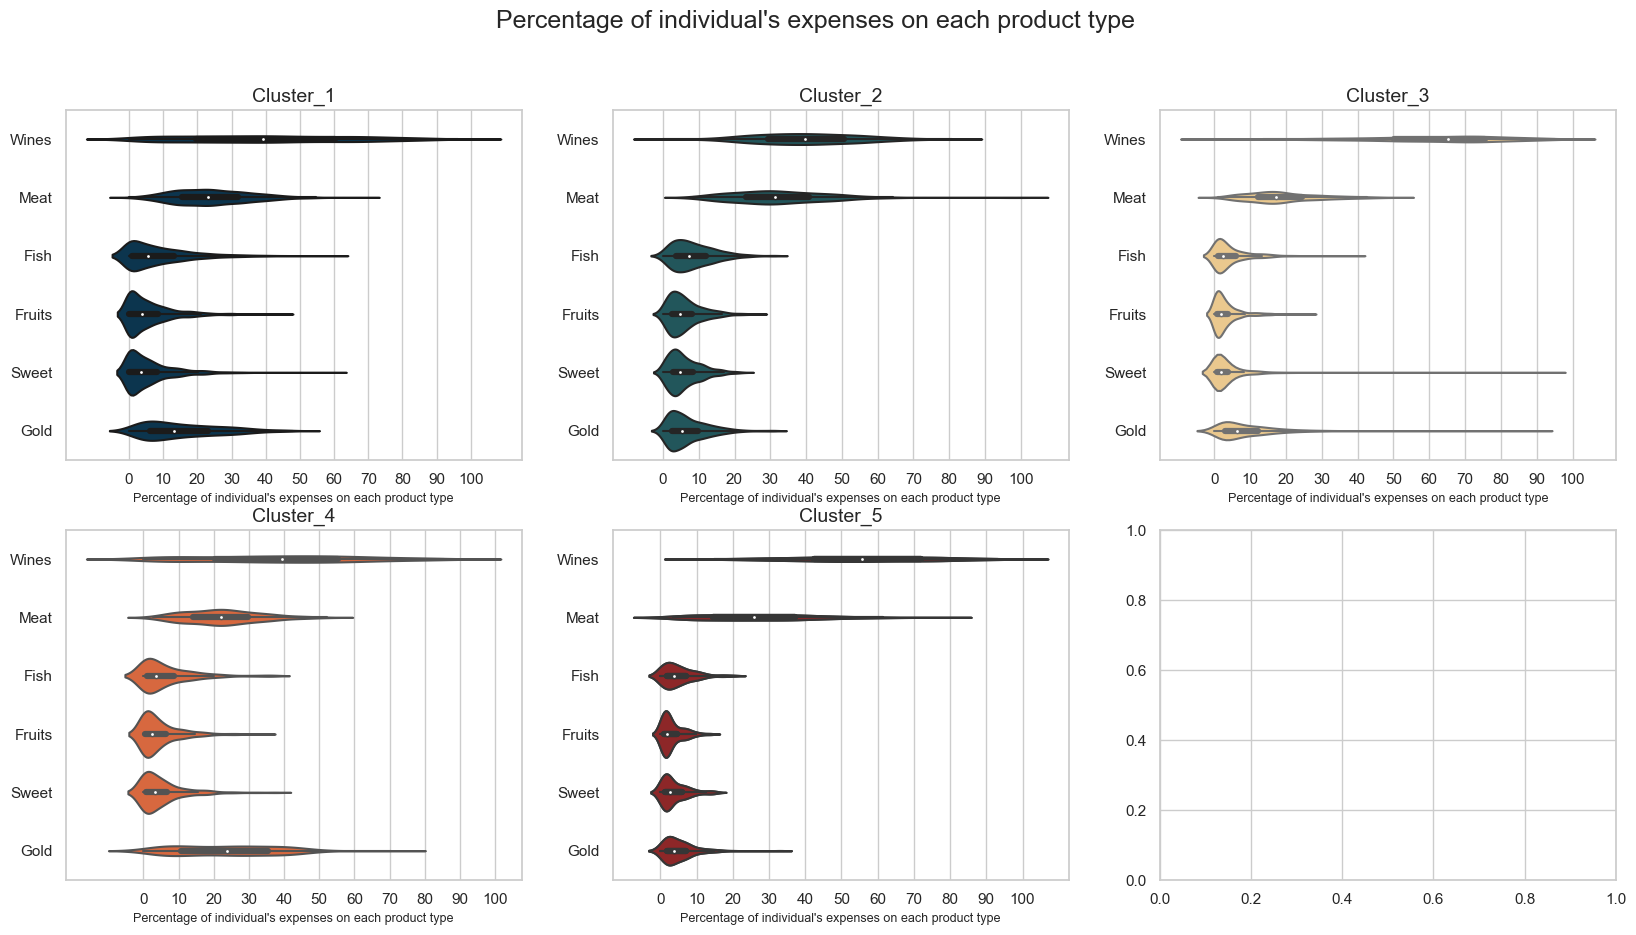

In [38]:
_col = [col for col in spent_df.columns if 'Perc' in col]
yticks = ["Wines","Meat","Fish","Fruits","Sweet","Gold"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

_ = spent_df.loc[spent_df['Cluster']=='Cluster_1',_col,]
sns.violinplot(data = _,
               ax=axes[0,0], 
               orient = 'h',
               color=colors[0])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_2', _col]
sns.violinplot(data = _,
               ax=axes[0,1], 
               orient = 'h',
               color=colors[1])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_3', _col]
sns.violinplot(data = _,
               ax=axes[0,2], 
               orient = 'h',
               color=colors[2])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_4', _col]
sns.violinplot(data = _,
               ax=axes[1,0], 
               orient = 'h',
               color=colors[3])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_5', _col]
sns.violinplot(data = _,
               ax=axes[1,1], 
               orient = 'h',
               color=colors[4])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_5', _col]
sns.violinplot(data = _,
               ax=axes[1,1], 
               orient = 'h',
               color=colors[4])


axes[0, 0].set_yticklabels(yticks)
axes[0, 1].set_yticklabels(yticks)
axes[0, 2].set_yticklabels(yticks)
axes[1, 0].set_yticklabels(yticks)
axes[1, 1].set_yticklabels(yticks)

x_ticks = range(0,110,10)
axes[0, 0].set_xticks(x_ticks)
axes[0, 1].set_xticks(x_ticks)
axes[0, 2].set_xticks(x_ticks)
axes[1, 0].set_xticks(x_ticks)
axes[1, 1].set_xticks(x_ticks)


axes[0, 0].set_title("Cluster_1", fontsize = 14)
axes[0, 1].set_title("Cluster_2", fontsize = 14)
axes[0, 2].set_title("Cluster_3", fontsize = 14)
axes[1, 0].set_title("Cluster_4", fontsize = 14)
axes[1, 1].set_title("Cluster_5", fontsize = 14)

x_label = "Percentage of individual's expenses on each product type"
axes[0, 0].set_xlabel(x_label, fontsize = 9)
axes[0, 1].set_xlabel(x_label, fontsize = 9)
axes[0, 2].set_xlabel(x_label, fontsize = 9)
axes[1, 0].set_xlabel(x_label, fontsize = 9)
axes[1, 1].set_xlabel(x_label, fontsize = 9)

fig.suptitle("Percentage of individual's expenses on each product type", fontsize = 18);

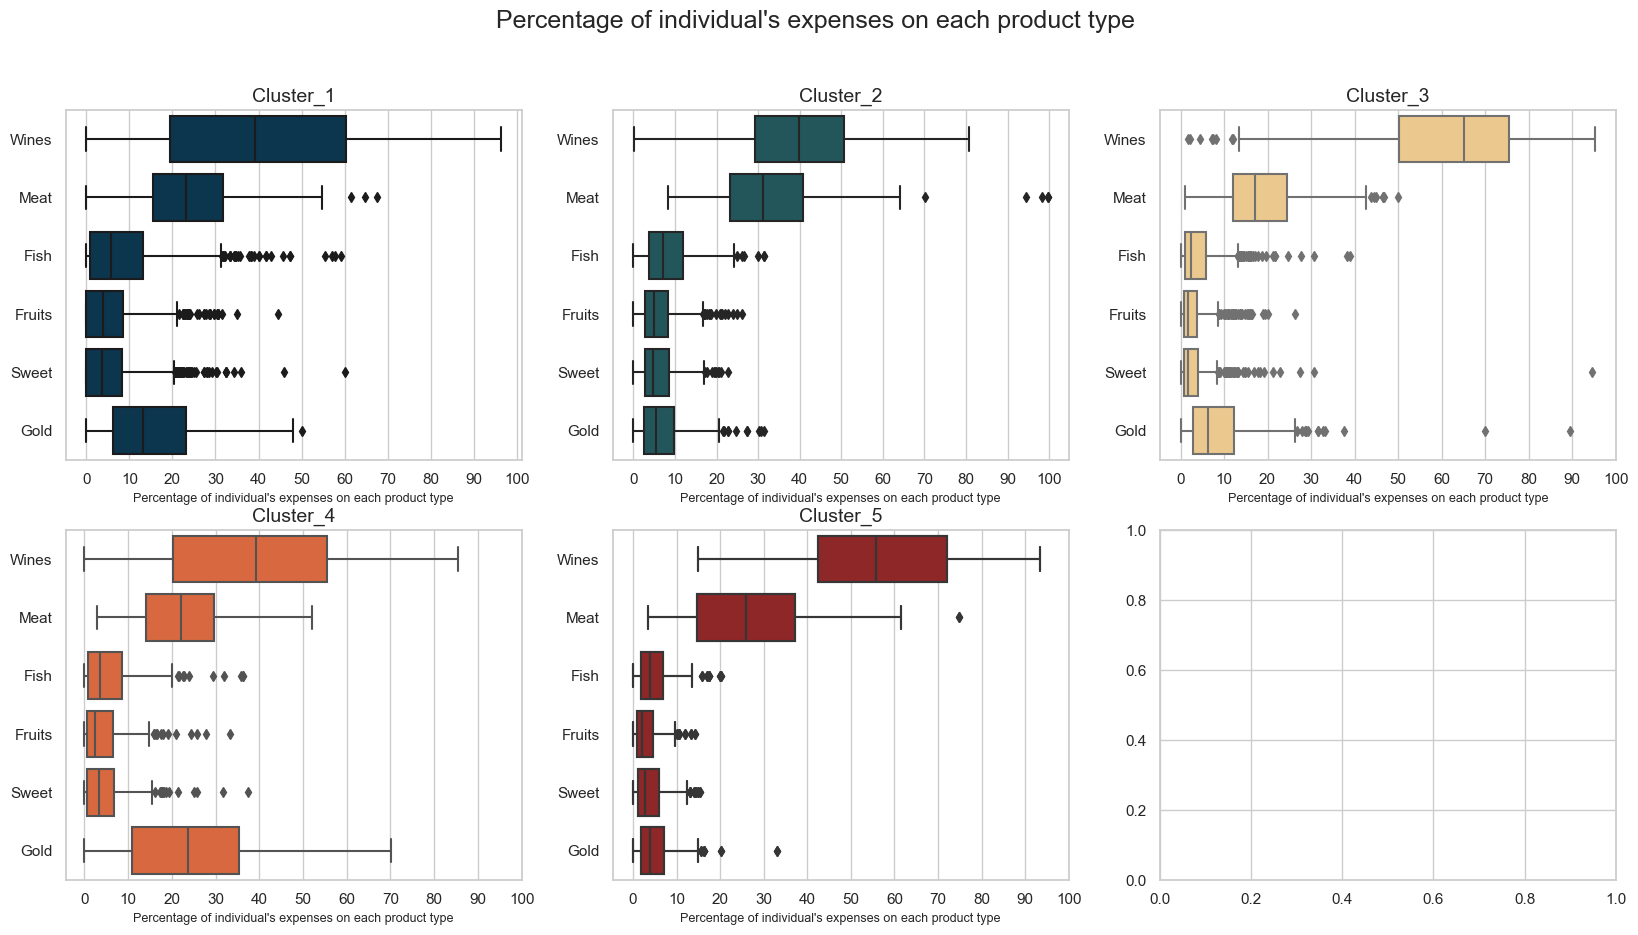

In [41]:
_col = [col for col in spent_df.columns if 'Perc' in col]
yticks = ["Wines","Meat","Fish","Fruits","Sweet","Gold"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

_ = spent_df.loc[spent_df['Cluster']=='Cluster_1',_col,]
sns.boxplot(data = _,
               ax=axes[0,0], 
               orient = 'h',
               color=colors[0])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_2', _col]
sns.boxplot(data = _,
               ax=axes[0,1], 
               orient = 'h',
               color=colors[1])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_3', _col]
sns.boxplot(data = _,
               ax=axes[0,2], 
               orient = 'h',
               color=colors[2])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_4', _col]
sns.boxplot(data = _,
               ax=axes[1,0], 
               orient = 'h',
               color=colors[3])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_5', _col]
sns.boxplot(data = _,
               ax=axes[1,1], 
               orient = 'h',
               color=colors[4])

_ = spent_df.loc[spent_df['Cluster']=='Cluster_5', _col]
sns.boxplot(data = _,
               ax=axes[1,1], 
               orient = 'h',
               color=colors[4])


axes[0, 0].set_yticklabels(yticks)
axes[0, 1].set_yticklabels(yticks)
axes[0, 2].set_yticklabels(yticks)
axes[1, 0].set_yticklabels(yticks)
axes[1, 1].set_yticklabels(yticks)

x_ticks = range(0,110,10)
axes[0, 0].set_xticks(x_ticks)
axes[0, 1].set_xticks(x_ticks)
axes[0, 2].set_xticks(x_ticks)
axes[1, 0].set_xticks(x_ticks)
axes[1, 1].set_xticks(x_ticks)


axes[0, 0].set_title("Cluster_1", fontsize = 14)
axes[0, 1].set_title("Cluster_2", fontsize = 14)
axes[0, 2].set_title("Cluster_3", fontsize = 14)
axes[1, 0].set_title("Cluster_4", fontsize = 14)
axes[1, 1].set_title("Cluster_5", fontsize = 14)

x_label = "Percentage of individual's expenses on each product type"
axes[0, 0].set_xlabel(x_label, fontsize = 9)
axes[0, 1].set_xlabel(x_label, fontsize = 9)
axes[0, 2].set_xlabel(x_label, fontsize = 9)
axes[1, 0].set_xlabel(x_label, fontsize = 9)
axes[1, 1].set_xlabel(x_label, fontsize = 9)

fig.suptitle("Percentage of individual's expenses on each product type", fontsize = 18);

#### Remarks
*Generally*<br>
It does not appear there is significant difference across the clusters:
- Noted Cluster 3 have higher % of their expenses on Wine
- Noted Cluster 4 have higher % of their expenses on Gold


||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Cluster size|~ 40%|~ 20%|~ 20%|~ 10%|~ 10%|
|Income|Lowest|High|Moderate|Low|Highest|
|Expenditure|Lowest|Higher|Moderate|Low|Highest|
|Number of Purchases|Lowest|High|High|Low|High|
|Number of Accepted Campaign Offers|Majority 0|Majority 0|Majority 0|Majority 1-2|Majority 2-4|
|Kids & Teens|<li>~ 47% have 1-2 Teens<li>~70% have 1-2 Kids|<li>Dominantly no kids or teens|<li>Dominantly no kids<li> Dominantly have 1 Teen|<li>Dominantly 1-2 kids <li>~45% 1 Teen|<li>Dominantly no kids or teens|
|Education|<li>Undergrad 16% <li> Graduate >> Post_grad|<li>Undergrad 10% <li> Graduate >> Post_grad|<li>Undergrad 6% <li> Graduate ≈ Post_grad|<li>Undergrad 11% <li> Graduate ≈ Post_grad|<li>Undergrad 6% <li> Graduate >> Post_grad|
|Relationship|>65% Attached|>65% Attached|>65% Attached|54% Attached|61% Attached|
|Age<br>*No significant difference between clusters*||||||
|Purchasing Platform|<li>*WEB visit*: High<li>*WEB Purch*: Low <li>*STORE*: Low <li>*CATALOG*: Low<li>Catalog < Web < Store|<li>*WEB visit*: Low <li>*WEB Purch*: Mod <li>*STORE*: High <li>*CATALOG*: Mod<li>Catalog ≈ Web < Store|<li>*WEB visit*: High <li>*WEB Purch*: High <li>*STORE*: High <li>*CATALOG*: Low<li>Catalog < Web ≈ Store|<li>*WEB visit*: High <li>*WEB Purch*: Low <li>*STORE*: Low <li>*CATALOG*: Low<li>Catalog < Web ≈ Store|<li>*WEB visit*: Low <li>*WEB Purch*: Mod <li>*STORE*: High <li>*CATALOG*: Mod<li>Catalog ≈ Web < Store|
|Product Expenses|Generally Below Avg|Generally Above Avg|Generally Around Avg|Generally Below Avg|Generally Above Avg|
|Product Expenses<br>(*Unique observation*)|||Consumer have higher % of their expenditure on <br>WINE (IQR 50-75%) <br>vs other clusters|Consumer have higher % of their expenditure on <br>GOLD (IQR 11-35%) <br>vs other clusters||




## 3.3 Campaigns Offers Acceptance

In [39]:
#form a subset dataframe for following analysis
col_ls = [col for col in df.columns if 'AcceptedCmp' in col]
col_ls.sort()
col_ls.append('Cluster')

Cmp_df = df.loc[:, col_ls]
Cmp_df.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpLast,Cluster
0,0,0,0,0,0,1,Cluster_2
1,0,0,0,0,0,0,Cluster_1
2,0,0,0,0,0,0,Cluster_3
3,0,0,0,0,0,0,Cluster_1
4,0,0,0,0,0,0,Cluster_3


In [26]:
df.groupby('Cluster')['TotalCmpAccepted'].sum()

Cluster
Cluster_1      9
Cluster_2    163
Cluster_3    123
Cluster_4    235
Cluster_5    464
Name: TotalCmpAccepted, dtype: int64

In [45]:
ordr = df['Cluster'].unique().tolist()
ordr.sort()
ordr

['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5']

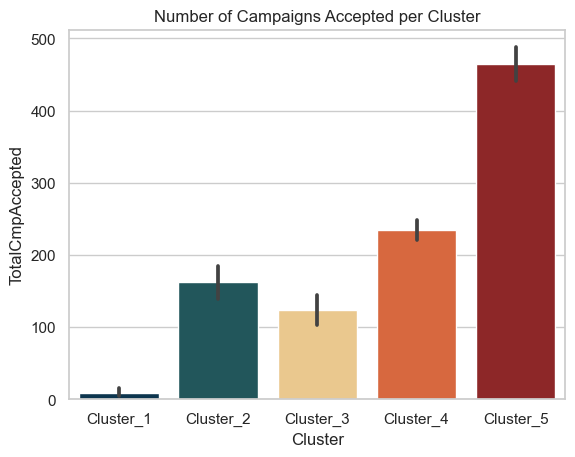

In [49]:
sns.barplot(data = df,
                     x = 'Cluster',
                     y = 'TotalCmpAccepted',
                     estimator='sum',
                     palette = colors,
                     order = ordr);
plt.title('Number of Campaigns Accepted per Cluster');

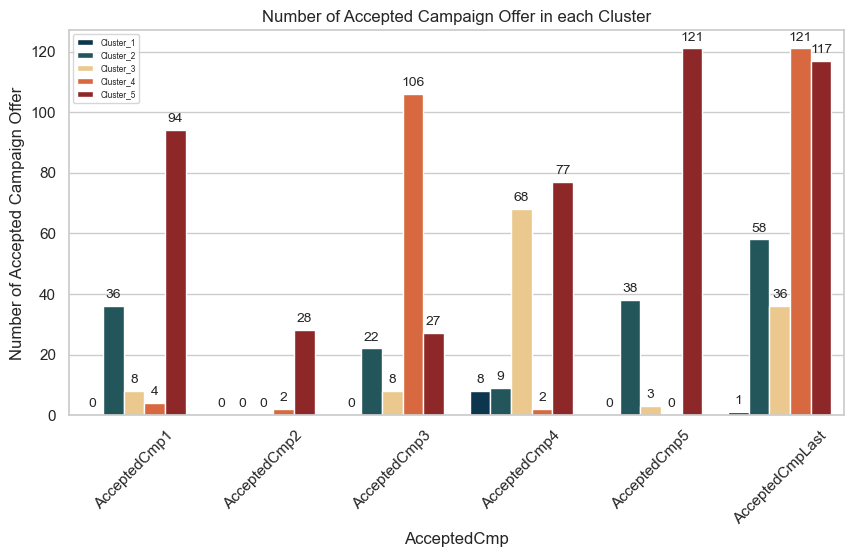

In [40]:
#plot bar chart
chart_df = Cmp_df.groupby('Cluster').sum()

chart_df.reset_index(inplace = True)

df_melt = chart_df.melt(id_vars = ['Cluster'],
             var_name='AcceptedCmp',
              value_name='Value')
fig = plt.figure(figsize = (10,5))
_chart = sns.barplot(x='AcceptedCmp',
                     y='Value',
                     hue='Cluster',
                     data=df_melt,
                     palette = colors);
annotation_fx(_chart)
_chart
plt.xticks(rotation = 45)
plt.legend(fontsize = 6)
plt.title("Number of Accepted Campaign Offer in each Cluster")
plt.ylabel("Number of Accepted Campaign Offer");

#### Remarks

||Cluster 1|Cluster 2|Cluster 3|Cluster 4|Cluster 5|
|---|---|---|---|---|---|
|Cluster size|~ 40%|~ 20%|~ 20%|~ 10%|~ 10%|
|Income|Lowest|High|Moderate|Low|Highest|
|Expenditure|Lowest|Higher|Moderate|Low|Highest|
|Number of Purchases|Lowest|High|High|Low|High|
|Number of Accepted Campaign Offers|Majority 0|Majority 0|Majority 0|Majority 1-2|Majority 2-4|
|Kids & Teens|<li>~ 47% have 1-2 Teens<li>~70% have 1-2 Kids|<li>Dominantly no kids or teens|<li>Dominantly no kids<li> Dominantly have 1 Teen|<li>Dominantly 1-2 kids <li>~45% 1 Teen|<li>Dominantly no kids or teens|
|Education|<li>Undergrad 16% <li> Graduate >> Post_grad|<li>Undergrad 10% <li> Graduate >> Post_grad|<li>Undergrad 6% <li> Graduate ≈ Post_grad|<li>Undergrad 11% <li> Graduate ≈ Post_grad|<li>Undergrad 6% <li> Graduate >> Post_grad|
|Relationship|>65% Attached|>65% Attached|>65% Attached|54% Attached|61% Attached|
|Age<br>*No significant difference between clusters*||||||
|Purchasing Platform|<li>*WEB visit*: High<li>*WEB Purch*: Low <li>*STORE*: Low <li>*CATALOG*: Low<li>Catalog < Web < Store|<li>*WEB visit*: Low <li>*WEB Purch*: Mod <li>*STORE*: High <li>*CATALOG*: Mod<li>Catalog ≈ Web < Store|<li>*WEB visit*: High <li>*WEB Purch*: High <li>*STORE*: High <li>*CATALOG*: Low<li>Catalog < Web ≈ Store|<li>*WEB visit*: High <li>*WEB Purch*: Low <li>*STORE*: Low <li>*CATALOG*: Low<li>Catalog < Web ≈ Store|<li>*WEB visit*: Low <li>*WEB Purch*: Mod <li>*STORE*: High <li>*CATALOG*: Mod<li>Catalog ≈ Web < Store|
|Product Expenses|Generally Below Avg|Generally Above Avg|Generally Around Avg|Generally Below Avg|Generally Above Avg|
|Product Expenses<br>(*Unique observation*)|||Consumer have higher % of their expenditure on <br>WINE (IQR 50-75%) <br>vs other clusters|Consumer have higher % of their expenditure on <br>GOLD (IQR 11-35%) <br>vs other clusters||
|Campaign Offer Acceptance|*CMP1:* 0<br>*CMP2:* 0<br>*CMP3:* 0<br><code>*CMP4:* 8</code><br>*CMP5:* 0<br>*CMPLast:* 1<br>|*CMP1:* 36<br>*CMP2:* 0<br>*CMP3:* 22<br>*CMP4:* 8<br>*CMP5:* 38<br><code>*CMPLast:* 58</code><br>|*CMP1:* 8<br>*CMP2:* 0<br>*CMP3:* 8<br><code>*CMP4:* 68</code><br>*CMP5:* 3<br>*CMPLast:* 36<br>|*CMP1:* 4<br>*CMP2:* 2<br><code>*CMP3:* 106</code><br>*CMP4:* 2<br>*CMP5:* 0<br><code>*CMPLast:* 121</code><br>|<code>*CMP1:* 94</code><br>*CMP2:* 28<br>*CMP3:* 27<br><code>*CMP4:* 77</code><br><code>*CMP5:* 121</code><br><code>*CMPLast:* 117</code><br>|

# PART 4: MARKETING STRATEGIES DISCUSSION

Let's look at the cluster overview and relate the findings to possible marketing strategies.

![](Images/Cluster_overview_1.jpg)
![](Images/Cluster_overview_2.jpg)
![](Images/Cluster_overview_3.jpg)
![](Images/Demographic.jpg)
![](Images/Cluster_summary.jpg)
![](Images/Martketing_strat_1.jpg)
![](Images/Martketing_strat_2.jpg)